In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)
mouse_drug_data

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
...,...,...
245,i669,Placebo
246,r850,Placebo
247,a262,Placebo
248,q787,Placebo


In [3]:
clinical_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
drug_data = pd.merge(mouse_drug_data,clinical_data,on="Mouse ID",how ="right")

# Display the data table for preview
drug_data

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


In [5]:
drug_data['Drug'].value_counts()

Capomulin    230
Ramicane     228
Stelasyn     194
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug, dtype: int64

In [6]:
drug_data['Timepoint'].value_counts()

0     252
5     240
10    225
15    209
20    197
25    184
30    172
35    155
40    142
45    130
Name: Timepoint, dtype: int64

## Tumor Response to Treatment

In [7]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_by_drug = drug_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
tumor_data = pd.DataFrame(tumor_volume_by_drug)
# Preview DataFrame
tumor_data_df=tumor_data.unstack(level=0)
tumor_data_df

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [8]:
tumor_data

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_volume = drug_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
sem_tumor_data = pd.DataFrame(sem_tumor_volume)
# Preview DataFrame

sem_tumor_data

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [10]:
sem_data = sem_tumor_data.rename(columns ={
    "Tumor Volume (mm3)" : "Standard Error of Tumor Volumes"
})
sem_data

Standard Error of Tumor Volumes
Drug      Timepoint                                 
Capomulin 0                                 0.000000
          5                                 0.448593
          10                                0.702684
          15                                0.838617
          20                                0.909731
...                                              ...
Zoniferol 25                                0.602513
          30                                0.800043
          35                                0.881426
          40                                0.998515
          45                                1.003576

[100 rows x 1 columns]

In [11]:
# Minor Data Munging to Re-Format the Data Frames

sem_data_df=sem_data.unstack(level=0)

# Preview that Reformatting worked
sem_data_df

Standard Error of Tumor Volumes                                \
Drug                            Capomulin  Ceftamin Infubinol  Ketapril   
Timepoint                                                                 
0                                0.000000  0.000000  0.000000  0.000000   
5                                0.448593  0.164505  0.235102  0.264819   
10                               0.702684  0.236144  0.282346  0.357421   
15                               0.838617  0.332053  0.357705  0.580268   
20                               0.909731  0.359482  0.476210  0.726484   
25                               0.881642  0.439356  0.550315  0.755413   
30                               0.934460  0.490620  0.631061  0.934121   
35                               1.052241  0.692248  0.984155  1.127867   
40                               1.223608  0.708505  1.055220  1.158449   
45                               1.223977  0.902358  1.144427  1.453186   

                                                                       
Drug       Naftisol   Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                              
0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.202385  0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.319415  0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.444378  0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.595260  0.839609  0.555181  0.786199  0.621889  0.533182  
25         0.813706  1.034872  0.577401  0.746991  0.741922  0.602513  
30         0.975496  1.218231  0.746045  0.864906  0.899548  0.800043  
35         1.013769  1.287481  1.084929  0.967433  1.003186  0.881426  
40         1.118567  1.370634  1.564779  1.128445  1.410435  0.998515  
45         1.416363  1.351726  1.888586  1.226805  1.576556  1.003576

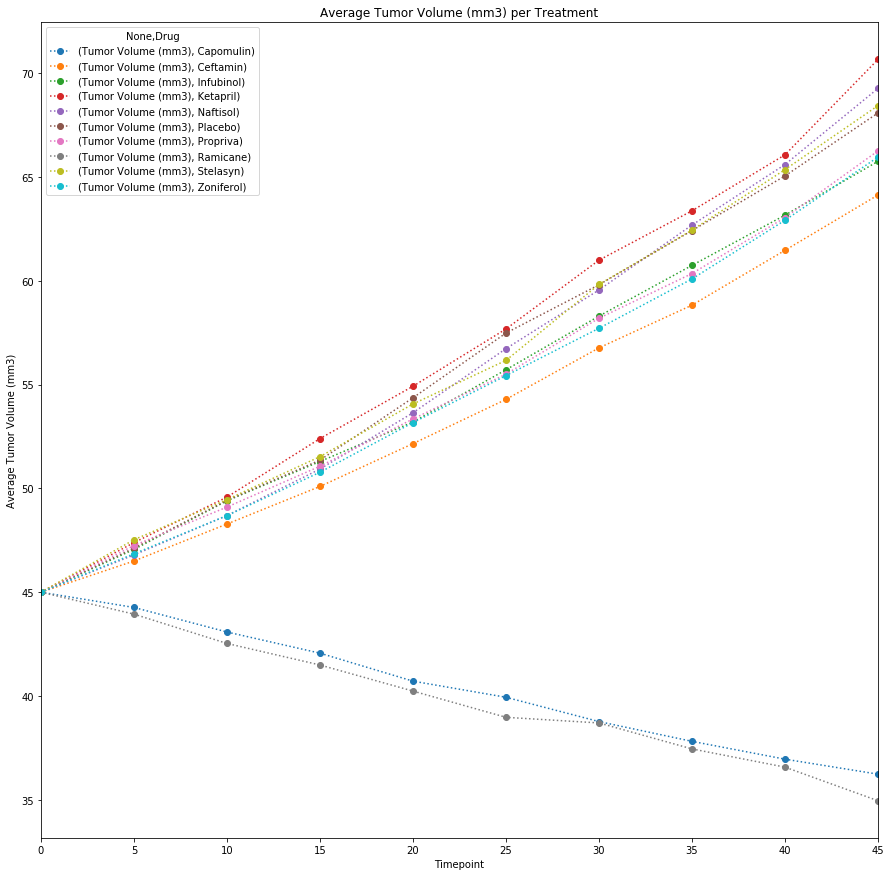

In [12]:
tumor_data_df.plot(kind='line', marker="o",figsize=(15,15),title="Average Tumor Volume (mm3) per Treatment",linestyle='dotted')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig("images/TumorVolumePerTreatment.png")
plt.show()

In [13]:
#x-axis for tumor volume average and sem
tumor_data_index = tumor_data_df.index.array
sem_data_index = sem_data_df.index.array
sem_data_index

<PandasArray>
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
Length: 10, dtype: int64

In [14]:
tumor_data_array = np.array(tumor_data_df)
drug1=tumor_data_array[:,0]
drug2=tumor_data_array[:,1]
drug3=tumor_data_array[:,2]
drug4=tumor_data_array[:,3]
drug5=tumor_data_array[:,4]
drug6=tumor_data_array[:,5]
drug7=tumor_data_array[:,6]
drug8=tumor_data_array[:,7]
drug9=tumor_data_array[:,8]
drug10=tumor_data_array[:,9]
print(drug10)

[45.         46.85181827 48.68988143 50.77905905 53.17033369 55.43293487
 57.71353092 60.08937222 62.91669188 65.96088789]


In [15]:
sem_data_array = np.array(sem_data_df)
sem_drug1=sem_data_array[:,0]
sem_drug2=sem_data_array[:,1]
sem_drug3=sem_data_array[:,2]
sem_drug4=sem_data_array[:,3]
sem_drug5=sem_data_array[:,4]
sem_drug6=sem_data_array[:,5]
sem_drug7=sem_data_array[:,6]
sem_drug8=sem_data_array[:,7]
sem_drug9=sem_data_array[:,8]
sem_drug10=sem_data_array[:,9]

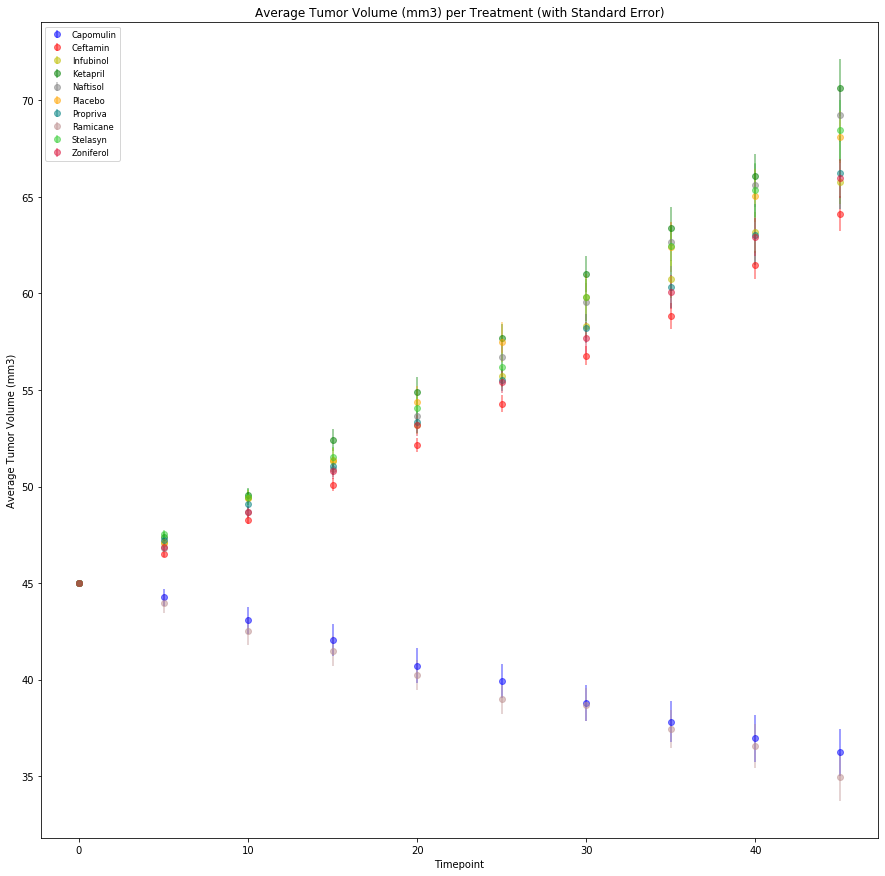

In [32]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots(figsize=(15,15))
ax.errorbar(sem_data_index, drug1, sem_drug1, fmt="o", color="b",
            alpha=0.5, label="Capomulin")
ax.errorbar(sem_data_index, drug2, sem_drug2, fmt="o", color="r",
            alpha=0.5, label="Ceftamin")
ax.errorbar(sem_data_index, drug3, sem_drug3, fmt="o", color="y",
            alpha=0.5, label="Infubinol")
ax.errorbar(sem_data_index, drug4, sem_drug4, fmt="o", color="green",
            alpha=0.5, label="Ketapril")
ax.errorbar(sem_data_index, drug5, sem_drug5, fmt="o", color="gray",
            alpha=0.5, label="Naftisol")
ax.errorbar(sem_data_index, drug6, sem_drug6, fmt="o", color="orange",
            alpha=0.5, label="Placebo")
ax.errorbar(sem_data_index, drug7, sem_drug7, fmt="o", color="teal",
            alpha=0.5, label="Propriva")
ax.errorbar(sem_data_index, drug8, sem_drug8, fmt="o", color="rosybrown",
            alpha=0.5, label="Ramicane")
ax.errorbar(sem_data_index, drug9, sem_drug9, fmt="o", color="limegreen",
            alpha=0.5, label="Stelasyn")
ax.errorbar(sem_data_index, drug10, sem_drug10, fmt="o", color="crimson",
            alpha=0.5, label="Zoniferol")

ax.set_xlabel("Timepoint")
ax.set_ylabel("Average Tumor Volume (mm3)")
ax.set_title("Average Tumor Volume (mm3) per Treatment (with Standard Error)")
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("images/Tumor_Volume_With_Error_Bar.png")

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [17]:
drug_data

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


In [18]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_data= pd.DataFrame(drug_data.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean())
# Preview DataFrame
mean_met_data

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [19]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
sem_met_data = pd.DataFrame(drug_data.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem())
sem_met_data


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [20]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_df = mean_met_data.unstack(level=0)
mean_met_df
# Preview that Reformatting worked


Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

In [21]:
sem_met_df = sem_met_data.unstack(level=0)
sem_met_df


Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   
25                0.181818  0.258831  0.265753  0.288275  0.185240  0.263888   
30                0.172944  0.249479  0.227823  0.347467  0.266667  0.300264   
35                0.169496  0.266526  0.224733  0.361418  0.330464  0.341412   
40                0.175610  0.289128  0.314466  0.315725  0.321702  0.297294   
45                0.202591  0.286101  0.309320  0.278722  0.351104  0.304240   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378  
25         0.199095  0.119430  0.219824  0.236621  
30         0.266469  0.139968  0.230641  0.248168  
35         0.366667  0.145997  0.240983  0.285714  
40         0.433903  0.160591  0.312815  0.299791  
45         0.428571  0.190221  0.359062  0.286400

In [22]:
mean_met_array = np.array(mean_met_df)
met_drug1=mean_met_array [:,0]
met_drug2=mean_met_array [:,1]
met_drug3=mean_met_array [:,2]
met_drug4=mean_met_array [:,3]
met_drug5=mean_met_array [:,4]
met_drug6=mean_met_array [:,5]
met_drug7=mean_met_array [:,6]
met_drug8=mean_met_array [:,7]
met_drug9=mean_met_array [:,8]
met_drug10=mean_met_array [:,9]
print(met_drug10)

[0.         0.16666667 0.5        0.80952381 1.29411765 1.6875
 1.93333333 2.28571429 2.78571429 3.07142857]


In [23]:
sem_met_array = np.array(sem_met_df)
sem_met_drug1=sem_met_array [:,0]
sem_met_drug2=sem_met_array [:,1]
sem_met_drug3=sem_met_array [:,2]
sem_met_drug4=sem_met_array [:,3]
sem_met_drug5=sem_met_array [:,4]
sem_met_drug6=sem_met_array [:,5]
sem_met_drug7=sem_met_array [:,6]
sem_met_drug8=sem_met_array [:,7]
sem_met_drug9=sem_met_array [:,8]
sem_met_drug10=sem_met_array [:,9]
print(sem_met_drug10)

[0.         0.07770873 0.10910895 0.11167657 0.16637807 0.23662118
 0.24816789 0.28571429 0.29979061 0.28640028]


In [24]:
#x-axis
timepoint_array = mean_met_df.index.array
timepoint_array

<PandasArray>
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
Length: 10, dtype: int64

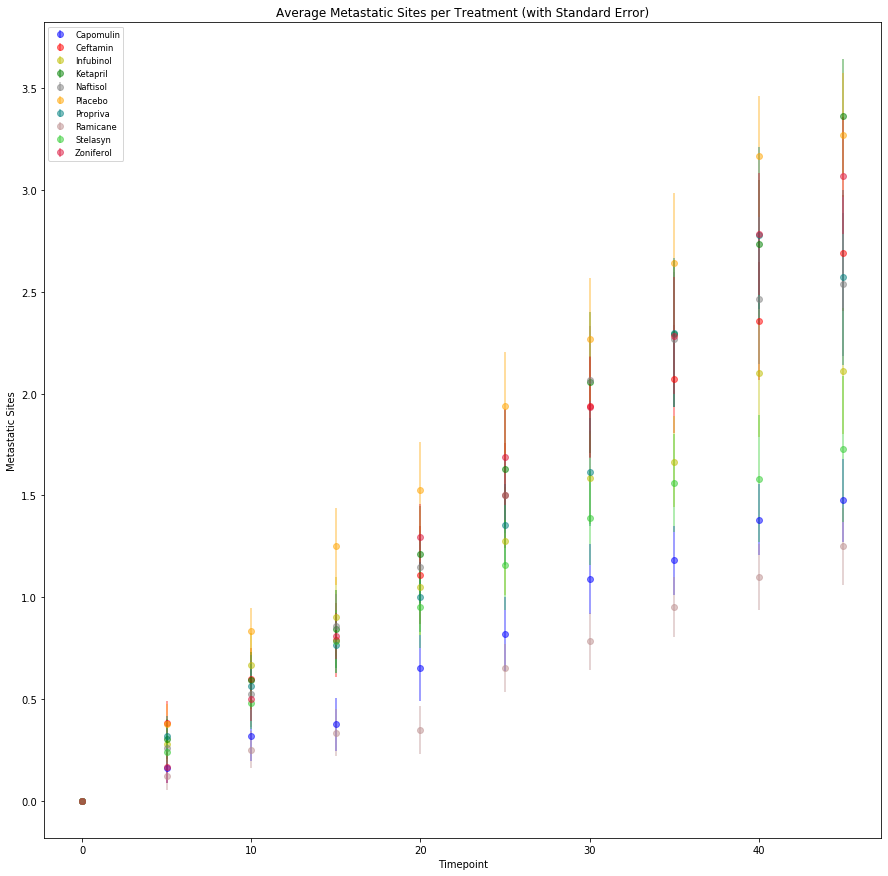

In [25]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(figsize=(15,15))

ax.errorbar(timepoint_array, met_drug1, sem_met_drug1, fmt="o", color="b",
            alpha=0.5, label="Capomulin")
ax.errorbar(timepoint_array, met_drug2, sem_met_drug2, fmt="o", color="r",
            alpha=0.5, label="Ceftamin")
ax.errorbar(timepoint_array, met_drug3, sem_met_drug3, fmt="o", color="y",
            alpha=0.5, label="Infubinol")
ax.errorbar(timepoint_array, met_drug4, sem_met_drug4, fmt="o", color="green",
            alpha=0.5, label="Ketapril")
ax.errorbar(timepoint_array, met_drug5, sem_met_drug5, fmt="o", color="gray",
            alpha=0.5, label="Naftisol")
ax.errorbar(timepoint_array, met_drug6, sem_met_drug6, fmt="o", color="orange",
            alpha=0.5, label="Placebo")
ax.errorbar(timepoint_array, met_drug7, sem_met_drug7, fmt="o", color="teal",
            alpha=0.5, label="Propriva")
ax.errorbar(timepoint_array, met_drug8, sem_met_drug8, fmt="o", color="rosybrown",
            alpha=0.5, label="Ramicane")
ax.errorbar(timepoint_array, met_drug9, sem_met_drug9, fmt="o", color="limegreen",
            alpha=0.5, label="Stelasyn")
ax.errorbar(timepoint_array, met_drug10, sem_met_drug10, fmt="o", color="crimson",
            alpha=0.5, label="Zoniferol")

ax.set_xlabel("Timepoint")
ax.set_ylabel("Metastatic Sites")
ax.set_title("Average Metastatic Sites per Treatment (with Standard Error)")
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("images/Metastatic_Sites_With_Error_Bar.png")
# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [26]:
drug_data["Mouse ID"].value_counts()
#print(len(drug_data["Mouse ID"].value_counts()))

g989    26
m601    10
i738    10
a520    10
l733    10
        ..
d133     1
n482     1
l872     1
t573     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [27]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)# Convert to DataFrame
mouse_data = pd.DataFrame(drug_data.groupby(['Drug', 'Timepoint'])['Mouse ID'].count())
mouse_data
# Preview DataFrame


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
...                       ...
Zoniferol 25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

In [33]:
# Minor Data Munging to Re-Format the Data Frames
mouse_data_df = mouse_data.unstack(level=0)

# Preview the Data Frame
mouse_data_df

Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   
25               22       18        18       19       18      17       14   
30               22       16        17       18       15      15       13   
35               22       14        12       17       15      14       10   
40               21       14        10       15       15      12        9   
45               21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

In [51]:
mouse_data = np.array(mouse_data_df)
initial_mouse_data = mouse_data[0,:]
final_mouse_data = mouse_data[9,:]
percent_survival_array_45 = np.round(((final_mouse_data/initial_mouse_data)*100),2)
percent_survival_array_45

array([84.  , 52.  , 36.  , 44.  , 52.  , 44.  , 26.92, 80.  , 42.31,
       56.  ])

In [52]:
percent_survival_array_5 = np.round(((mouse_data[1,:]/initial_mouse_data)*100),2)
percent_survival_array_10 = np.round(((mouse_data[2,:]/initial_mouse_data)*100),2)
percent_survival_array_15 = np.round(((mouse_data[3,:]/initial_mouse_data)*100),2)
percent_survival_array_20 = np.round(((mouse_data[4,:]/initial_mouse_data)*100),2)
percent_survival_array_25 = np.round(((mouse_data[5,:]/initial_mouse_data)*100),2)
percent_survival_array_30 = np.round(((mouse_data[6,:]/initial_mouse_data)*100),2)
percent_survival_array_35 = np.round(((mouse_data[7,:]/initial_mouse_data)*100),2)
percent_survival_array_40 = np.round(((mouse_data[8,:]/initial_mouse_data)*100),2)
#percent_survival_array_15

array([96.  , 76.  , 84.  , 76.  , 84.  , 80.  , 65.38, 96.  , 88.46,
       84.  ])

In [29]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots(figsize=(10,10))

ax.errorbar(timepoint_array, met_drug1, sem_met_drug1, fmt="o", color="b",
            alpha=0.5, label="Capomulin")
# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [30]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [31]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)